In [1]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from mlxtend.classifier import EnsembleVoteClassifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [55]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels as sm
from sklearn.preprocessing import LabelBinarizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
#All the data set imports
grade_data_2 = pd.read_csv('Grade_Set_2.csv')

In [13]:
x,y = make_classification(n_samples=5000,n_features=20,n_classes=2,weights=[0.9,0.1],random_state=2017)

In [11]:
print('Positive class ', y.tolist().count(1))

Positive class  515


In [12]:
print('Negative class ', y.tolist().count(0))

Negative class  4485


In [3]:
rus = RandomUnderSampler()
ros = RandomOverSampler()
sme = SMOTE()

x_rus , y_rus = rus.fit_sample(x,y)
x_ros , y_ros = ros.fit_sample(x,y)
x_sme , y_sme = sme.fit_sample(x,y)

#plotting the graph to see the distruibution of x and y, all the oversampling and all the undersampling
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.scatter(x[y==0,0],x[y==0,1],marker='o',color='blue')
plt.scatter(x[y==1,0],x[y==1,1],marker='+',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('The original dataset drawing 1=%s,0=%s' %(y.tolist().count(1),y.tolist().count(0)))

plt.subplot(2,2,2)
plt.scatter(x_rus[y_rus==0,0],x_rus[y_rus==0,1],marker='o',color='blue')
plt.scatter(x_rus[y_rus==1,0],x_rus[y_rus==1,1],marker='+',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('For Random undersampling 1=%s,0=%s' %(y_rus.tolist().count(1),y_rus.tolist().count(0)))

plt.subplot(2,2,3)
plt.scatter(x_ros[y_ros==0,0],x_ros[y_ros==0,1],marker='o',color='blue')
plt.scatter(x_ros[y_ros==1,0],x_ros[y_ros==1,1],marker='+',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('The random oversampling dataset drawing 1=%s,0=%s' %(y_ros.tolist().count(1),y_ros.tolist().count(0)))

plt.subplot(2,2,4)
plt.scatter(x_sme[y_sme==0,0],x_sme[y_sme==0,1],marker='o',color='blue')
plt.scatter(x_sme[y_sme==1,0],x_sme[y_sme==1,1],marker='+',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('The SMOTE dataset drawing 1=%s,0=%s' %(y_sme.tolist().count(1),y_sme.tolist().count(0)))

plt.tight_layout()
plt.show()

NameError: name 'x' is not defined

In [41]:
metrics.accuracy_score(y_ros, clf_ros.predict(x_ros))

0.9996655518394649

In [6]:
#Now to do machine learning on the dataset and using the roc_auc_score has the metric
classifier = RandomForestClassifier()
clf_ros = classifier.fit(x_ros,y_ros)
clf_rus = classifier.fit(x_rus,y_rus)
clf_sme = classifier.fit(x_sme,y_sme)
print('Accuracy on Random oversampling ', metrics.accuracy_score(y_ros, clf_ros.predict(x_ros)))
print('Accuracy on Random undersampling ', metrics.accuracy_score(y_rus, clf_ros.predict(x_rus)))
print('Accuracy on SMOTE oversampling ', metrics.accuracy_score(y_sme, clf_ros.predict(x_sme)))


NameError: name 'x_ros' is not defined

In [6]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
x = diabetes.iloc[:,:8].values
y = diabetes['Class']
classifier = RandomForestClassifier()
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 2017,test_size = 0.2)

In [4]:
train_cv_scores = cross_val_score(classifier,x_train,y_train,scoring='accuracy',cv=5)
test_cv_scores = cross_val_score(classifier,x_test,y_test,scoring='accuracy',cv=5)

C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\ensem

In [5]:
train_cv_scores

array([0.74193548, 0.78225806, 0.74590164, 0.75409836, 0.7295082 ])

In [6]:
test_cv_scores

array([0.8125    , 0.70967742, 0.74193548, 0.86666667, 0.86666667])

In [7]:
train_cv_scores.mean()

0.7507403490216816

In [8]:
test_cv_scores.mean()

0.799489247311828

In [9]:
kfold = StratifiedKFold(random_state = 2017,n_splits=5)
clf_dt = DecisionTreeClassifier(max_depth=1, random_state=2017).fit(x_train,y_train)
results = cross_val_score(clf_dt, x_train, y_train, cv=kfold,scoring='accuracy')
print('\nDecision Tree classifier, CV mean results', results.mean())
print('Decision tree classifier accuracy on testset', metrics.accuracy_score(y_test,clf_dt.predict(x_test)))

bagger = BaggingClassifier(clf_dt,n_estimators=100,random_state=2017).fit(x_train, y_train)
results_bagger = cross_val_score(bagger, x_train, y_train, cv=kfold,scoring='accuracy')
print('\nBagging classifier, CV mean results', results_bagger.mean())
print('Bagging classifier accuracy on testset', metrics.accuracy_score(y_test,bagger.predict(x_test)))


random_guy = RandomForestClassifier(n_estimators=100,random_state=2017).fit(x_train, y_train)
results_rf = cross_val_score(random_guy, x_train, y_train, cv=kfold,scoring='accuracy')
print('\nRandom Forest classifier, CV mean results', results_rf.mean())
print('Random Forest classifier accuracy on testset', metrics.accuracy_score(y_test,random_guy.predict(x_test)))


Decision Tree classifier, CV mean results 0.6838180856689583
Decision tree classifier accuracy on testset 0.7922077922077922

Bagging classifier, CV mean results 0.7100475938656795
Bagging classifier accuracy on testset 0.8051948051948052

Random Forest classifier, CV mean results 0.753939714436806
Random Forest classifier accuracy on testset 0.7987012987012987


In [10]:
kfold

StratifiedKFold(n_splits=5, random_state=2017, shuffle=False)

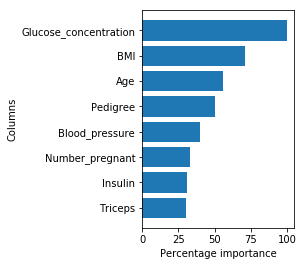

In [11]:
#visualizing the feature importances
feature_importance = random_guy.feature_importances_
feature_importance_list = 100*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance_list)
pos = np.arange(len(feature_importance)) + .5
plt.subplot(1,2,2)
plt.barh(pos, feature_importance_list[sorted_idx],align='center')
plt.yticks(pos, diabetes.columns[sorted_idx])
plt.xlabel('Percentage importance')
plt.ylabel('Columns')
plt.show()

In [12]:
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state = 2017).fit(x_train, y_train)
results_extra = cross_val_score(extra_trees, x_train, y_train, cv=kfold)
print('\nExtra Trees classifier, CV mean results', results_extra.mean())
print('Extra Trees classifier accuracy on testset', metrics.accuracy_score(y_test,extra_trees.predict(x_test)))


Extra Trees classifier, CV mean results 0.7425171866737176
Extra Trees classifier accuracy on testset 0.8181818181818182


In [13]:
clf_ada = AdaBoostClassifier(clf_dt,n_estimators=100,learning_rate=0.1,random_state=2017).fit(x_train,y_train)
results_ada = cross_val_score(clf_ada, x_train,y_train,scoring='accuracy',cv=kfold)

print('\nDecision Tree classifier, CV mean results', results.mean())
print('Decision tree classifier accuracy on testset', metrics.accuracy_score(y_test,clf_dt.predict(x_test)))

print('\nAdaBoost classifier, CV mean results', results_ada.mean())
print('AdaBoost classifier accuracy on testset', metrics.accuracy_score(y_test,clf_dt.predict(x_test)))


Decision Tree classifier, CV mean results 0.6838180856689583
Decision tree classifier accuracy on testset 0.7922077922077922

AdaBoost classifier, CV mean results 0.7523003701745108
AdaBoost classifier accuracy on testset 0.7922077922077922


In [14]:
clf_gradient = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=2017).fit(x_train, y_train)

In [32]:
results_gb = cross_val_score(clf_gradient, x_train, y_train,scoring='accuracy',cv=kfold)
print('Gradient Boosting Classifier ', results_gb.mean())
print('Gradient Boosting Classifier, ', metrics.accuracy_score(y_train, clf_gradient.predict(x_train)))
print('Gradient Boosting Classifier on test data, ', metrics.accuracy_score(y_test, clf_gradient.predict(x_test)))

Gradient Boosting Classifier  0.740983606557377
Gradient Boosting Classifier,  0.9153094462540716
Gradient Boosting Classifier on test data,  0.7922077922077922


In [16]:
results_gb

array([0.72580645, 0.77419355, 0.75409836, 0.73770492, 0.71311475])

## We are going to do a bit of study on XGBoost

In [17]:
clf_xgb = XGBClassifier(random_state=2017,seed=2017).fit(x_train, y_train,eval_set = [(x_test,y_test)],
                                                    early_stopping_rounds=20)
results_xgb = cross_val_score(clf_xgb, x_train, y_train, scoring='accuracy',cv=kfold)
print('XGBoost Classifier', results_xgb.mean())
print('XGBoost accuracy score on train, ', metrics.accuracy_score(y_train, clf_xgb.predict(x_train)))
print('XGBoost accuracy scroe on test, ', metrics.accuracy_score(y_test, clf_xgb.predict(x_test)))

[0]	validation_0-error:0.181818
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.162338
[2]	validation_0-error:0.162338
[3]	validation_0-error:0.162338
[4]	validation_0-error:0.162338
[5]	validation_0-error:0.181818
[6]	validation_0-error:0.162338
[7]	validation_0-error:0.175325
[8]	validation_0-error:0.175325
[9]	validation_0-error:0.181818
[10]	validation_0-error:0.181818
[11]	validation_0-error:0.201299
[12]	validation_0-error:0.201299
[13]	validation_0-error:0.194805
[14]	validation_0-error:0.201299
[15]	validation_0-error:0.214286
[16]	validation_0-error:0.220779
[17]	validation_0-error:0.220779
[18]	validation_0-error:0.207792
[19]	validation_0-error:0.214286
[20]	validation_0-error:0.207792
[21]	validation_0-error:0.207792
Stopping. Best iteration:
[1]	validation_0-error:0.162338

XGBoost Classifier 0.739344262295082
XGBoost accuracy score on train,  0.762214983713355
XGBoost accuracy scroe on test,  0.8376623376623377


In [23]:
#writing an XGBoost model from scratch
xgtrain = xgb.DMatrix(x_train, label=y_train)
xgtest = xgb.DMatrix(x_test, label=y_test)
param = {'objective':'binary:logistic', 'max_depth':3, 'learning_rate':0.1}
num_rounds = 100
clf_xgb_cv = xgb.cv(param,xgtrain,num_rounds,nfold=5, stratified= True, early_stopping_rounds=20,seed=2017)
print('Optimal number of trees ', clf_xgb_cv.shape[0])


[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:03:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

In [25]:
watch_list = [(xgtest, 'test'), (xgtrain,'train')]
clf_xgb_new = xgb.train(param,xgtrain,clf_xgb_cv.shape[0],watch_list)

[14:10:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	test-error:0.181818	train-error:0.239414
[14:10:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	test-error:0.162338	train-error:0.237785
[14:10:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	test-error:0.162338	train-error:0.237785
[14:10:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	test-error:0.162338	train-error:0.234528
[14:10:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	test-error:0.162338	train-error:0.228013
[14:10:43] C:\Users\

In [29]:
#predict on train and on test
y_preds_train = (clf_xgb_new.predict(xgtrain, ntree_limit= clf_xgb_new.best_iteration) > 0.5).astype(int)
y_preds_test = (clf_xgb_new.predict(xgtest, ntree_limit= clf_xgb_new.best_iteration) > 0.5).astype(int)

In [31]:
print('Accuracy score on train data ', metrics.accuracy_score(y_train,y_preds_train))
print('Accuracy score on test data ', metrics.accuracy_score(y_test, y_preds_test))

Accuracy score on train data  0.8387622149837134
Accuracy score on test data  0.7792207792207793


##  We are proceeding to use Ensemble Voting

In [9]:
LG = LogisticRegression(random_state=2017)
SV = SVC(probability=True)
DT = DecisionTreeClassifier(random_state=2017)
BC = BaggingClassifier(DT,n_estimators=100,random_state=2017)
KN = KNeighborsClassifier()
AD = AdaBoostClassifier(base_estimator=DT,learning_rate=0.01,n_estimators=100,random_state=2017)
GB = GradientBoostingClassifier(random_state=2017,learning_rate=0.01)
RF = RandomForestClassifier(random_state=2017,n_estimators=100)




In [10]:
#let use do our preparatory cv scores
clfs = []
print('5 fold cross-validation')
for clf, label in zip([LG,SV,DT,BC,KN,AD,GB,RF],['Logistic Regression','Support Vector',
                    'Decision Tree','Bagging Classifier','K Neighbors','Ada Boost','Gradient Boost','Random Forest']):
    scores = cross_val_score(clf,x_train,y_train,cv=5,scoring='accuracy')
    print('Train score for '+label+' '+str(scores.mean())+' , The standard deviation '+str(scores.std()))
    md = clf.fit(x_train,y_train)
    clfs.append(md)
    fpr, tpr, _ = metrics.roc_curve(y_test,clf.predict(x_test))
    print('Accuracy on test set ',metrics.accuracy_score(y_test, clf.predict(x_test)))
    print('Area under ROC Curve ',metrics.auc(fpr, tpr))

5 fold cross-validation


C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

Train score for Logistic Regression 0.7653622421998942 , The standard deviation 0.026913988025653642
Accuracy on test set  0.8116883116883117
Area under ROC Curve  0.7602322482391015


C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\svm\base.py:

Train score for Support Vector 0.7425171866737176 , The standard deviation 0.029341760082026557
Accuracy on test set  0.8116883116883117
Area under ROC Curve  0.7651818008756901
Train score for Decision Tree 0.7003437334743521 , The standard deviation 0.03219662813105037
Accuracy on test set  0.7467532467532467
Area under ROC Curve  0.6968399010089473
Train score for Bagging Classifier 0.7474616604970915 , The standard deviation 0.03512763098534
Accuracy on test set  0.8181818181818182
Area under ROC Curve  0.7799352750809061
Train score for K Neighbors 0.7246959280803809 , The standard deviation 0.027496847353948643
Accuracy on test set  0.7792207792207793
Area under ROC Curve  0.7409099562154959
Train score for Ada Boost 0.690613432046536 , The standard deviation 0.036775518237946496
Accuracy on test set  0.7337662337662337
Area under ROC Curve  0.7019798210546354
Train score for Gradient Boost 0.7425436277102062 , The standard deviation 0.024503808839446143
Accuracy on test set  0.8

C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## So I choose RandomForest, bagging classifier,Gradient Boost

In [11]:
#ensemble voting with Randomo foreest, Bagging Classififer, Gradient boost
print('Ensemble five-fold cross-validation')
EHV = EnsembleVoteClassifier([RF,BC,GB])
ESV = EnsembleVoteClassifier([RF,BC,GB], voting='soft',weights=[1,1,1])

for clf,label in zip([EHV,ESV],['Ensemble Hard voting', 'Ensemble soft']):
    scores = cross_val_score(clf,x_train,y_train,cv=5,scoring='accuracy')
    print('Train score for '+label+' '+str(scores.mean())+' , The standard deviation '+str(scores.std()))
    md = clf.fit(x_train,y_train)
    clfs.append(md)
    fpr, tpr, _ = metrics.roc_curve(y_test,clf.predict(x_test))
    print('Accuracy on test set ',metrics.accuracy_score(y_test, clf.predict(x_test)))
    print('Area under ROC Curve ',metrics.auc(fpr, tpr))

Ensemble five-fold cross-validation
Train score for Ensemble Hard voting 0.7523532522474882 , The standard deviation 0.030189295848808546
Accuracy on test set  0.8051948051948052
Area under ROC Curve  0.7553778793070627
Train score for Ensemble soft 0.757297726070862 , The standard deviation 0.024656376401023767
Accuracy on test set  0.8181818181818182
Area under ROC Curve  0.7749857224443175


In [12]:
kfold = StratifiedKFold(random_state=2017)
clfs_stacking = [RF,BC,GB]
dataset_keep_train = np.zeros((x_train.shape[0],len(clfs_stacking)))
dataset_keep_test = np.zeros((x_test.shape[0], len(clfs_stacking)))

for i,clf in enumerate(clfs_stacking):
    clf.fit(x_train, y_train)
    dataset_keep_train[:,i] = clf.predict_proba(x_train)[:,1]
    dataset_keep_test[:,i] = clf.predict_proba(x_test)[:,1]
    

C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\model_selection\_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [23]:
dataset_keep_train

array([[0.79      , 0.8       , 0.44240051],
       [0.77      , 0.78      , 0.46383936],
       [0.84      , 0.92      , 0.52615668],
       ...,
       [0.02      , 0.03      , 0.19878364],
       [0.72      , 0.68      , 0.30505067],
       [0.1       , 0.07      , 0.23371258]])

In [24]:
dataset_keep_test

array([[0.31      , 0.24      , 0.35021368],
       [0.78      , 0.84      , 0.52990937],
       [0.7       , 0.74      , 0.55619087],
       [0.7       , 0.74      , 0.62312107],
       [0.81      , 0.87      , 0.52615668],
       [0.07      , 0.06      , 0.16399653],
       [0.05      , 0.03      , 0.18691553],
       [0.16      , 0.16      , 0.19321764],
       [0.12      , 0.11      , 0.19321764],
       [0.13      , 0.06      , 0.16009354],
       [0.43      , 0.25      , 0.46878042],
       [0.09      , 0.02      , 0.15889199],
       [0.12      , 0.09      , 0.19878364],
       [0.08      , 0.1       , 0.2192618 ],
       [0.08      , 0.02      , 0.20375669],
       [0.18      , 0.05      , 0.19321764],
       [0.02      , 0.02      , 0.19321764],
       [0.31      , 0.33      , 0.45892   ],
       [0.03      , 0.        , 0.16058825],
       [0.01      , 0.01      , 0.16399653],
       [0.61      , 0.77      , 0.58816903],
       [0.66      , 0.62      , 0.50757051],
       [0.

In [13]:
clf_gb_new = GradientBoostingClassifier(learning_rate=0.01,random_state=2017)
clf_gb_new.fit(dataset_keep_train,y_train)
scores = cross_val_score(clf_gb_new,dataset_keep_train,y_train,cv=kfold,scoring='accuracy')
y_preds = clf_gb_new.predict(dataset_keep_test)
print('Train score for stacking'+str(scores.mean())+' , The standard deviation '+str(scores.std()))
fpr, tpr, _ = metrics.roc_curve(y_test,y_preds)
print('Accuracy on test set ',metrics.accuracy_score(y_test, y_preds))
print('Area under ROC Curve ',metrics.auc(fpr, tpr))


Train score for stacking1.0 , The standard deviation 0.0
Accuracy on test set  0.8116883116883117
Area under ROC Curve  0.7602322482391015


In [18]:
clf_rf_new = RandomForestClassifier(random_state=2017).fit(x_train, y_train)
rf_params = {'n_estimators':[400,420,440,460,480,500],
            'criterion':['gini','entropy'],
            'max_features':[None, 'log2','sqrt','auto'],
            'max_depth':[1,3,5,7,9]}
grid = GridSearchCV(clf_rf_new,rf_params,scoring='accuracy',n_jobs=-1,cv=kfold)
grid.fit(x_train, y_train)
scores = cross_val_score(grid.best_estimator_,x_train,y_train,cv=kfold,scoring='accuracy')
print('Best Parameters', grid.best_params_)
print('Scores on Train CV ',scores.mean())
print('Accuracy on testset ', metrics.accuracy_score(y_test,grid.best_estimator_.predict(x_test)))

C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 420}
Scores on Train CV  0.7735738308268291
Accuracy on testset  0.7987012987012987


In [20]:
#writing code for Randomized search
from sklearn.model_selection import RandomizedSearchCV
clf_rf_new = RandomForestClassifier(random_state=2017,n_estimators = 100).fit(x_train, y_train)
rf_params = {'n_estimators':range(400,420),
            'criterion':['gini','entropy'],
            'max_features':[None, 'log2','sqrt','auto'],
            'max_depth':[1,3,5,7,9]}
random_search = RandomizedSearchCV(clf_rf_new,rf_params,n_iter=50,scoring='accuracy',n_jobs=-1,cv=kfold)
random_search.fit(x,y)
scores = cross_val_score(random_search.best_estimator_,x_train,y_train,cv=kfold,scoring='accuracy')
print('Best Parameters', random_search.best_params_)
print('Scores on Train CV ',scores.mean())
print('Accuracy on testset ', metrics.accuracy_score(y_test,random_search.best_estimator_.predict(x_test)))

Best Parameters {'n_estimators': 413, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'gini'}
Scores on Train CV  0.7523954565645029
Accuracy on testset  0.9675324675324676


In [1]:
import glob

In [8]:
grade_data_2.sample(5)

,Hours_Studied,Test_Grade
3,3.0,23
9,9.0,76
11,11.0,89
12,12.0,90
2,2.0,22


The R-Squared score for  1  is  0.9503677766997879
The R-Squared score for  2  is  0.9608726568678714
The R-Squared score for  3  is  0.9938323120374665
The R-Squared score for  4  is  0.9955000184096712
The R-Squared score for  5  is  0.9956204913897356


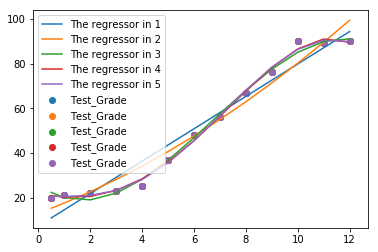

In [16]:
X = grade_data_2['Hours_Studied']
y = grade_data_2['Test_Grade']
lr = LinearRegression()
for deg in [1,2,3,4,5]:
    lr.fit(np.vander(X, deg + 1),y)
    y_pred = lr.predict(np.vander(X, deg + 1))
    plt.scatter(X,y)
    plt.plot(X,y_pred,label='The regressor in ' + str(deg))
    plt.legend(loc='best')
    print('The R-Squared score for ',deg, ' is ', r2_score(y,y_pred))
    

The R-Squared error becomes  0.9955000184096712


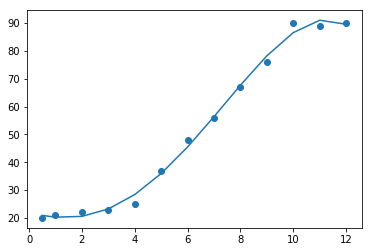

In [23]:
model = make_pipeline(PolynomialFeatures(degree=4), lr)
model.fit(X[:,np.newaxis],y)
plt.scatter(X,y,label='Original')
plt.plot(X[:,np.newaxis], model.predict(X[:,np.newaxis]), label='Degree 4')
print('The R-Squared error becomes ', r2_score(y,model.predict(X[:,np.newaxis])))

### When dealing with Multi-Collinearity VIF(Variation Inflation Factor) is used to detect largely correlated independent variables

##### A value of 10 and above is usually held as a strong indication of multicollinearity, a VIF value = 1 indicates no multicollinearity, a VIF value > 1 <= 5, states moderate collinearity

In [39]:
house_data = pd.read_csv('Housing_Modified.csv')
house_data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [28]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null object
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 51.3+ KB


In [40]:
house_data['stories'].unique()

array(['two', 'one', 'three', 'four'], dtype=object)

In [41]:
columns_dict = {}
for i in ['stories', 'driveway','recroom','fullbase','gashw','airco','prefarea']:
    columns_dict[i] = house_data[i].unique()

In [42]:
columns_dict

{'stories': array(['two', 'one', 'three', 'four'], dtype=object),
 'driveway': array(['yes', 'no'], dtype=object),
 'recroom': array(['no', 'yes'], dtype=object),
 'fullbase': array(['yes', 'no'], dtype=object),
 'gashw': array(['no', 'yes'], dtype=object),
 'airco': array(['no', 'yes'], dtype=object),
 'prefarea': array(['no', 'yes'], dtype=object)}

In [43]:
lb = LabelBinarizer()
for i in ['driveway','recroom','fullbase','gashw','airco','prefarea']:
    house_data[i] = lb.fit_transform(house_data[i])

In [44]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null object
driveway    546 non-null int32
recroom     546 non-null int32
fullbase    546 non-null int32
gashw       546 non-null int32
airco       546 non-null int32
garagepl    546 non-null int64
prefarea    546 non-null int32
dtypes: float64(1), int32(6), int64(4), object(1)
memory usage: 38.5+ KB


In [45]:
house_data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [47]:
house_data_stores = pd.get_dummies(house_data['stories'], drop_first= True)
house_data = pd.concat([house_data, house_data_stores], axis=1)

In [49]:
house_data.drop('stories',axis=1,inplace=True)

In [50]:
house_data.head()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,one,three,two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,1,0,0


In [51]:
house_data.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,one,three,two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.016610,-0.079170,-0.041931


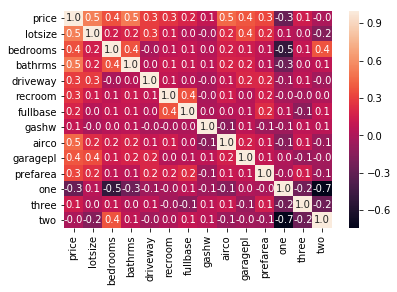

In [59]:
corr = house_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels = corr.columns.values,annot=True,fmt='.1f')

In [60]:
house_data.columns


Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'one', 'three',
       'two'],
      dtype='object')

In [61]:
house_data.shape

(546, 14)

In [62]:
independent_variables = ['lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'one', 'three',
       'two']

In [64]:
for i in np.arange(len(independent_variables)):
    vif = [variance_inflation_factor(house_data[independent_variables].values, ix) for ix in range(len(independent_variables))]
    maxloc = vif.index(max(vif))
    if max(vif) >= 10:
        print(vif)
        print('Dropping cause of strong multicollinearity ', independent_variables[maxloc])
        independent_variables.remove(independent_variables[maxloc])
    else:
        break

[8.958098087844336, 18.469878559519948, 8.984672347290864, 7.08857854209188, 1.477015281503392, 2.013320236472385, 1.1034879198994192, 1.756746206560902, 1.9826489313438442, 1.5332946465459893, 3.9657526747868594, 1.7700402770614867, 5.511702408354892]
Dropping cause of strong multicollinearity  bedrooms


In [65]:
independent_variables

['lotsize',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'one',
 'three',
 'two']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(house_data[independent_variables], house_data['price'],
                                                    train_size=.8, random_state=2)

C:\Users\Michael\Anaconda3.2\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [67]:
lm = sm.regression.linear_model.OLS(x_train, y_train).fit()


AttributeError: module 'statsmodels' has no attribute 'OLS'